In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

import requests, zipfile
import io

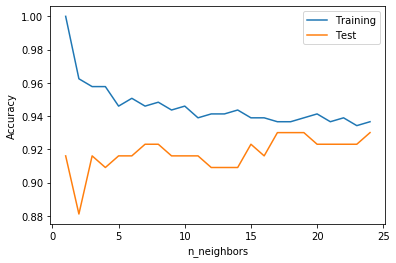

In [3]:
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1, 25):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1, 25), training_accuracy, label='Training')
plt.plot(range(1, 25), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [4]:
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.911
正解率(test):0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
from sklearn.preprocessing import StandardScaler
# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951
